# E-Commerce Customer Churn Prediction

Importing The Most Fundamental Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import scipy as scp

Loading The Dataset And Data Dictionary

In [2]:
df=pd.read_excel("E-Commerce Customer Churn Data.xlsx",sheet_name='E Comm')

In [3]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
df.drop(columns=["CustomerID"],inplace=True)

In [5]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Descriptive Analysis Of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [7]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Exploratory Data Analysis 

We Shall Explore The Dataset Feature By Feature

In [8]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


### Churn
Target Variable

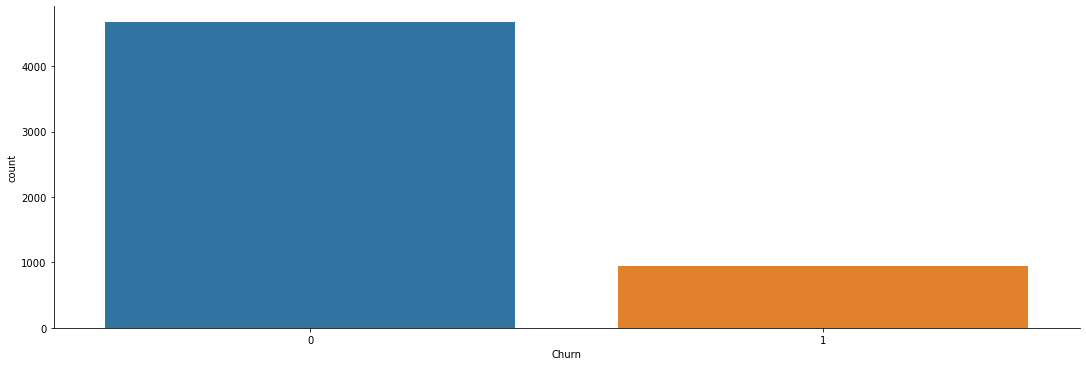

In [9]:
sns.catplot(data=df,x="Churn",aspect=3,kind="count")

The Data Is Not Very Balanced

### Tenure

In [10]:
df["Tenure"].isnull().sum()

264

We Shall Fill Nan Values With Column Median

In [11]:
df["Tenure"]=df["Tenure"].fillna(value=df["Tenure"].median())

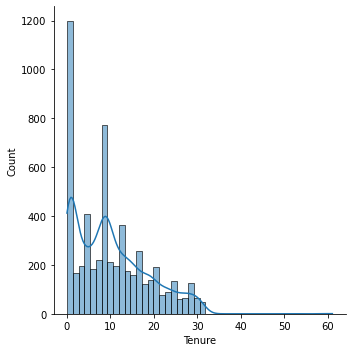

In [12]:
sns.displot(data=df,x="Tenure",kde=True)

<AxesSubplot:xlabel='Tenure'>

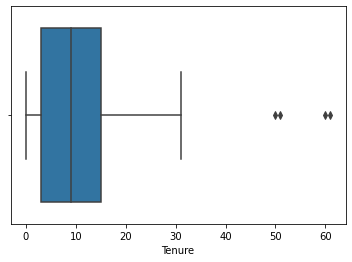

In [13]:
sns.boxplot(data=df,x="Tenure")

In [14]:
df['Tenure'].quantile(0.99)

30.0

In [15]:
df = df[(df['Tenure'] < 40)]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5626 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5626 non-null   int64  
 1   Tenure                       5626 non-null   float64
 2   PreferredLoginDevice         5626 non-null   object 
 3   CityTier                     5626 non-null   int64  
 4   WarehouseToHome              5375 non-null   float64
 5   PreferredPaymentMode         5626 non-null   object 
 6   Gender                       5626 non-null   object 
 7   HourSpendOnApp               5371 non-null   float64
 8   NumberOfDeviceRegistered     5626 non-null   int64  
 9   PreferedOrderCat             5626 non-null   object 
 10  SatisfactionScore            5626 non-null   int64  
 11  MaritalStatus                5626 non-null   object 
 12  NumberOfAddress              5626 non-null   int64  
 13  Complain          

### PreferredLoginDevice

In [17]:
df["PreferredLoginDevice"].isnull().sum()

0

No Nan Values

In [18]:
df["PreferredLoginDevice"].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

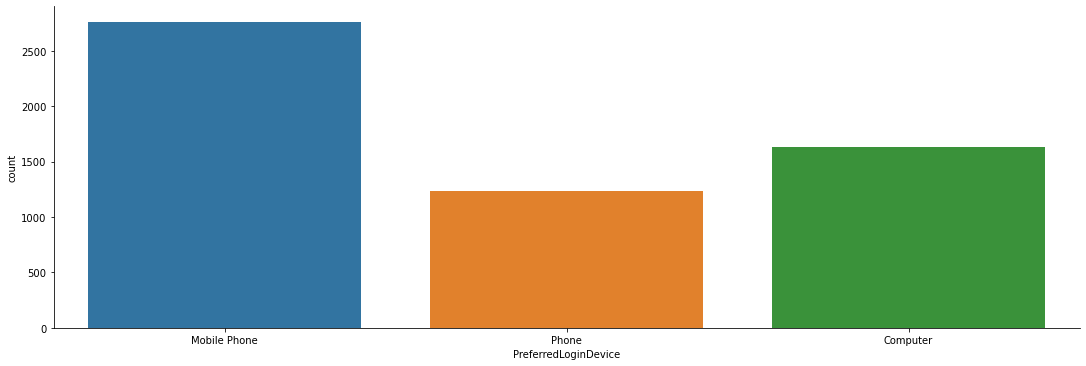

In [19]:
sns.catplot(data=df,x="PreferredLoginDevice",aspect=3,kind="count")

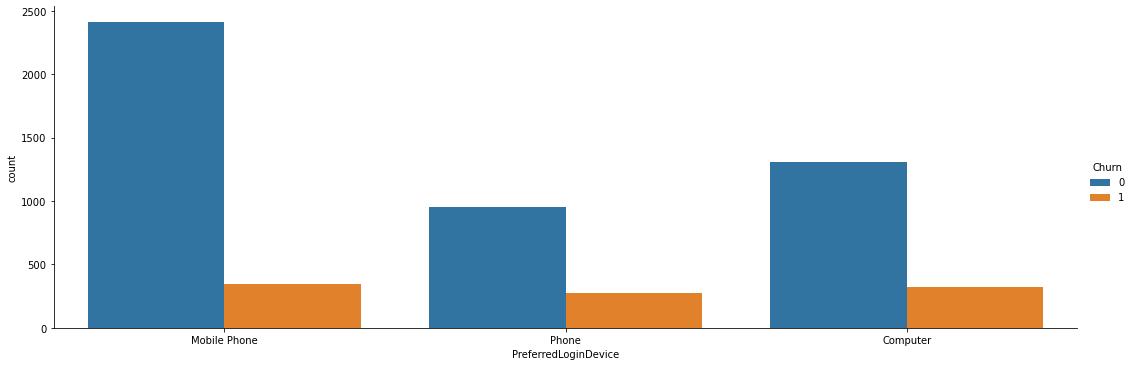

In [20]:
sns.catplot(data=df,x="PreferredLoginDevice",hue="Churn",aspect=3,kind="count")

Label Encoding Can Be Used Because There Is A Clear Hierarchy In Terms Of Statistics

### CityTier

In [21]:
df["CityTier"].isnull().sum()

0

No Nan Values

In [22]:
df["CityTier"].unique()

array([3, 1, 2], dtype=int64)

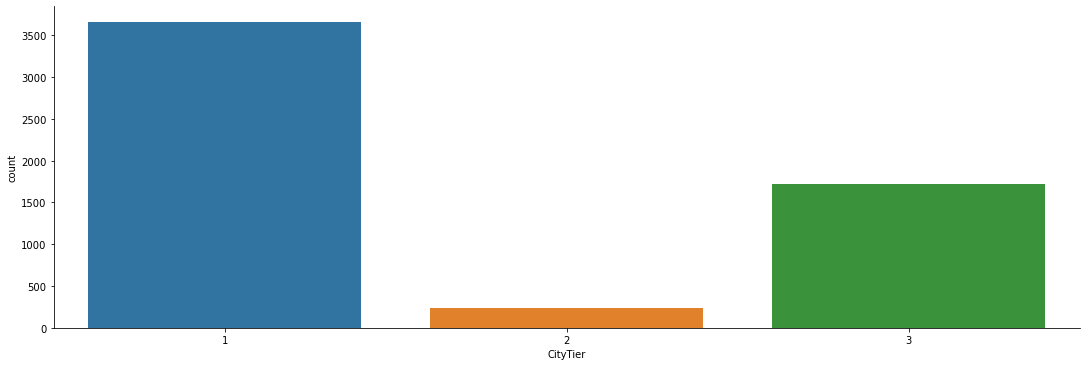

In [23]:
sns.catplot(data=df,x="CityTier",aspect=3,kind="count")

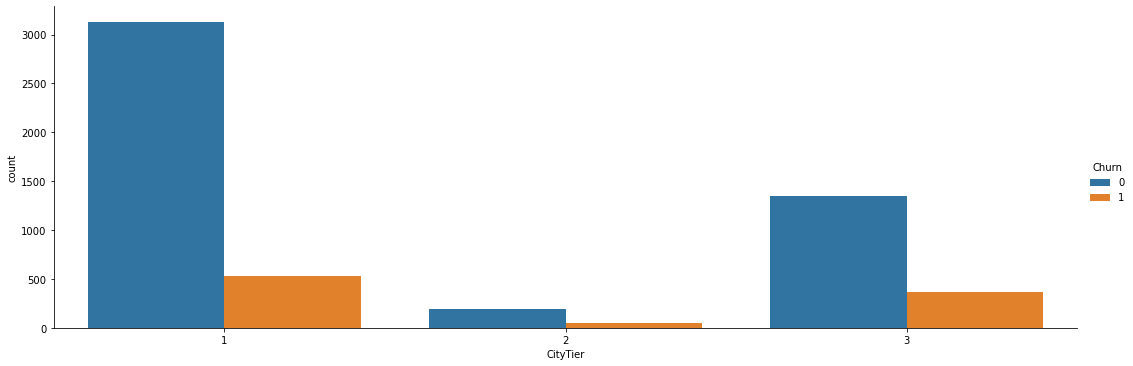

In [24]:
sns.catplot(data=df,x="CityTier",hue="Churn",aspect=3,kind="count")

Label Encoding Can Be Used Because There Is A Clear Hierarchy In Terms Of Statistics

### WarehouseToHome

In [25]:
df["WarehouseToHome"].isnull().sum()

251

In [26]:
df["WarehouseToHome"]=df["WarehouseToHome"].fillna(value=df["WarehouseToHome"].median())

<ipython-input-26-177bd83e8135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WarehouseToHome"]=df["WarehouseToHome"].fillna(value=df["WarehouseToHome"].median())


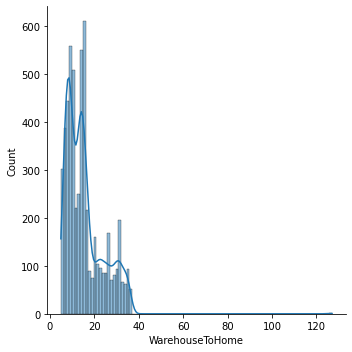

In [27]:
sns.displot(data=df,x="WarehouseToHome",kde=True)

<AxesSubplot:xlabel='WarehouseToHome'>

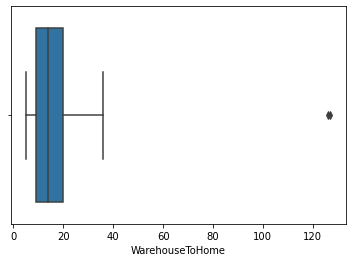

In [28]:
sns.boxplot(data=df,x="WarehouseToHome")

In [29]:
df = df[(df['WarehouseToHome'] < 60)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5624 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5624 non-null   int64  
 1   Tenure                       5624 non-null   float64
 2   PreferredLoginDevice         5624 non-null   object 
 3   CityTier                     5624 non-null   int64  
 4   WarehouseToHome              5624 non-null   float64
 5   PreferredPaymentMode         5624 non-null   object 
 6   Gender                       5624 non-null   object 
 7   HourSpendOnApp               5369 non-null   float64
 8   NumberOfDeviceRegistered     5624 non-null   int64  
 9   PreferedOrderCat             5624 non-null   object 
 10  SatisfactionScore            5624 non-null   int64  
 11  MaritalStatus                5624 non-null   object 
 12  NumberOfAddress              5624 non-null   int64  
 13  Complain          

### PreferredPaymentMode

In [31]:
df["PreferredPaymentMode"].isnull().sum()

0

No Nan Values

In [32]:
df["PreferredPaymentMode"].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

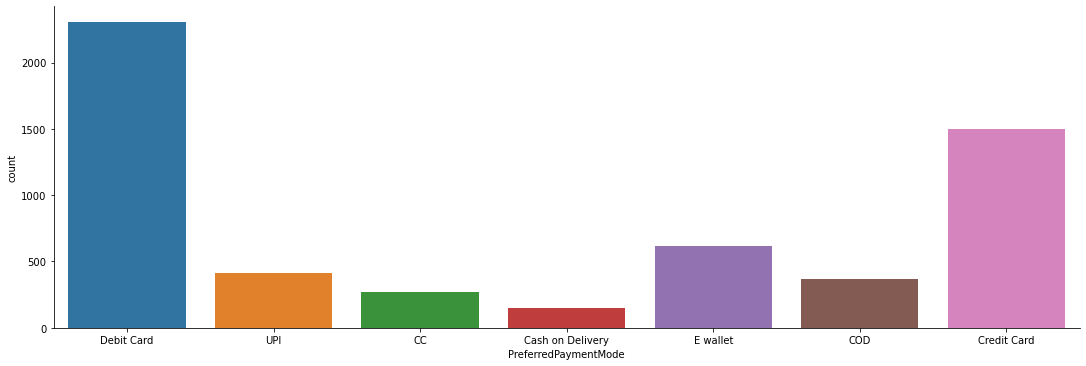

In [33]:
sns.catplot(data=df,x="PreferredPaymentMode",aspect=3,kind="count")

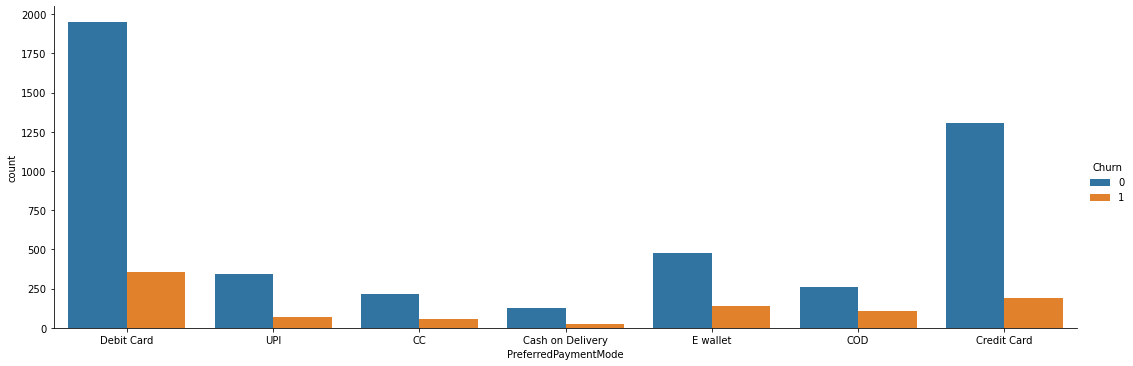

In [34]:
sns.catplot(data=df,x="PreferredPaymentMode",hue="Churn",aspect=3,kind="count")

Label Encoding Can Be Used Because There Is A Clear Hierarchy In Terms Of Statistics(Some Are Definitely More Likely To Leave Than Others

### Gender

In [35]:
df["Gender"].isnull().sum()

0

No Nan Values

In [36]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

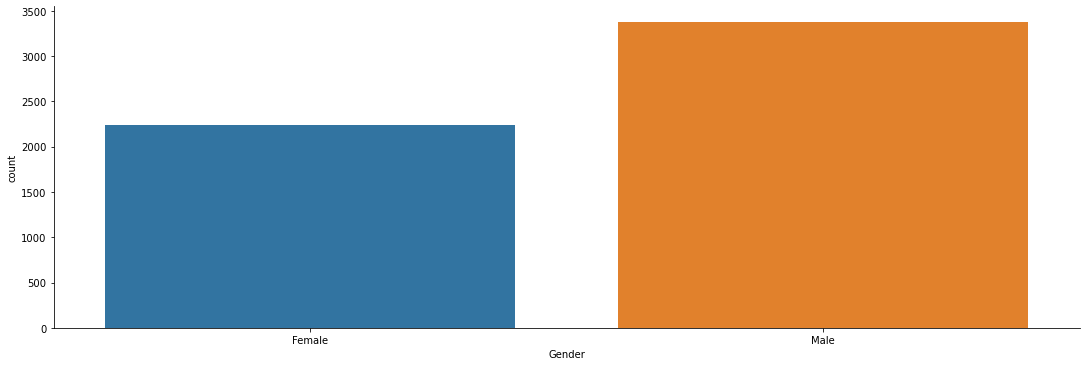

In [37]:
sns.catplot(data=df,x="Gender",aspect=3,kind="count")

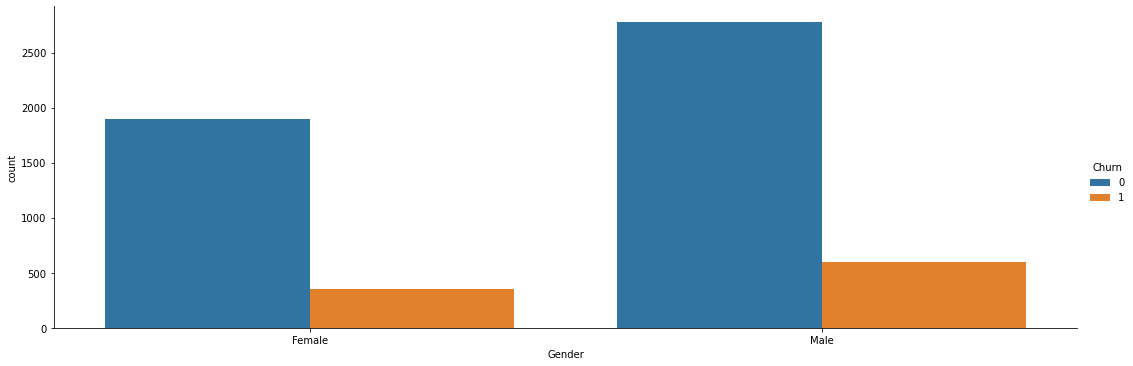

In [38]:
sns.catplot(data=df,x="Gender",hue="Churn",aspect=3,kind="count")

Label Encoding Can Be Used Because There Is A Clear Hierarchy In Terms Of Statistics

### HourSpendOnApp

In [39]:
df["HourSpendOnApp"].isnull().sum()

255

In [40]:
df["HourSpendOnApp"]=df["HourSpendOnApp"].fillna(value=df["HourSpendOnApp"].mean())

<ipython-input-40-7805cd1b51ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HourSpendOnApp"]=df["HourSpendOnApp"].fillna(value=df["HourSpendOnApp"].mean())


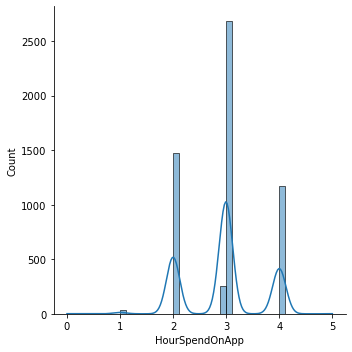

In [41]:
sns.displot(data=df,x="HourSpendOnApp",kde=True)

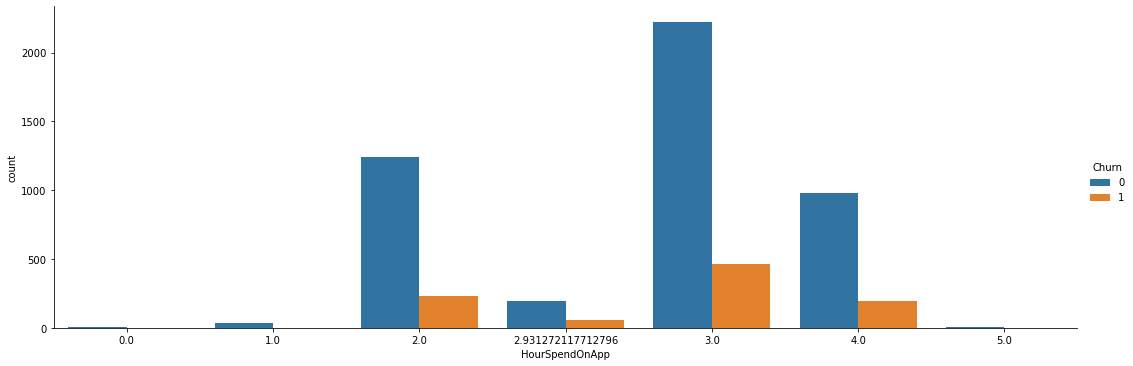

In [42]:
sns.catplot(data=df,x="HourSpendOnApp",hue="Churn",aspect=3,kind="count")

### NumberOfDeviceRegistered

In [43]:
df["NumberOfDeviceRegistered"].isnull().sum()

0

No Nan Values

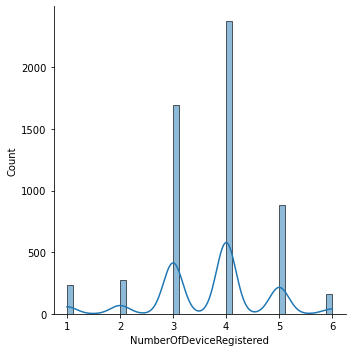

In [44]:
sns.displot(data=df,x="NumberOfDeviceRegistered",kde=True)

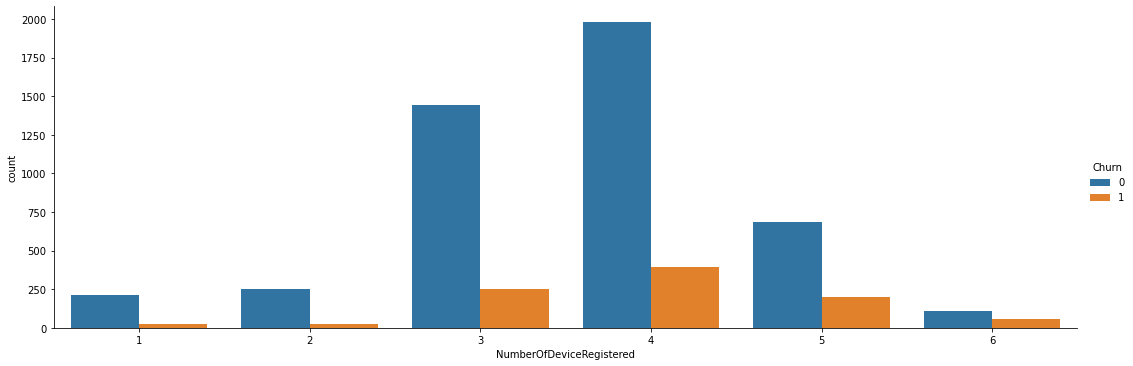

In [45]:
sns.catplot(data=df,x="NumberOfDeviceRegistered",hue="Churn",aspect=3,kind="count")

### SatisfactionScore

In [46]:
df["SatisfactionScore"].isnull().sum()

0

No Nan Values

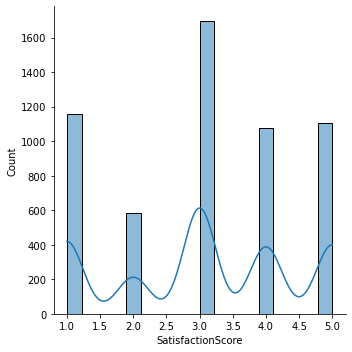

In [47]:
sns.displot(data=df,x="SatisfactionScore",kde=True)

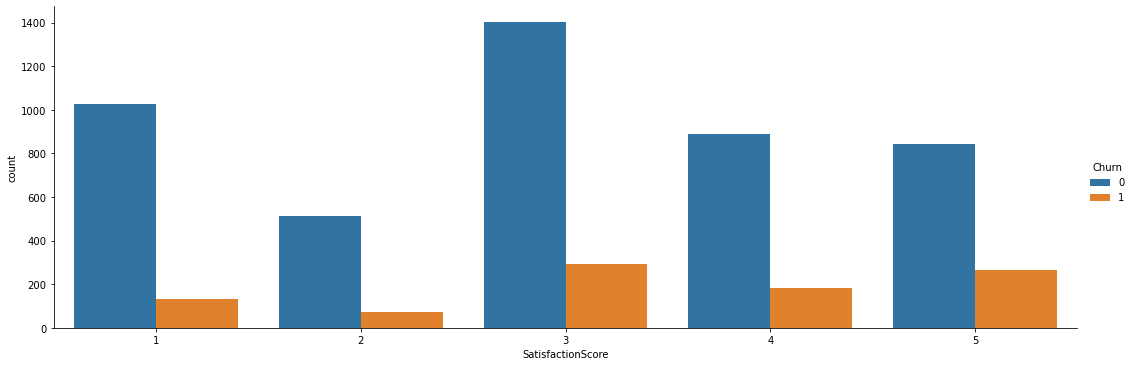

In [48]:
sns.catplot(data=df,x="SatisfactionScore",hue="Churn",aspect=3,kind="count")

Those Customers That Give A High Satisfaction Score Are Actually More Likely To Leave Which Questions The Credibility Of The Satisfaction Score

### MaritalStatus

In [49]:
df["MaritalStatus"].isnull().sum()

0

No Nan Values

In [50]:
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

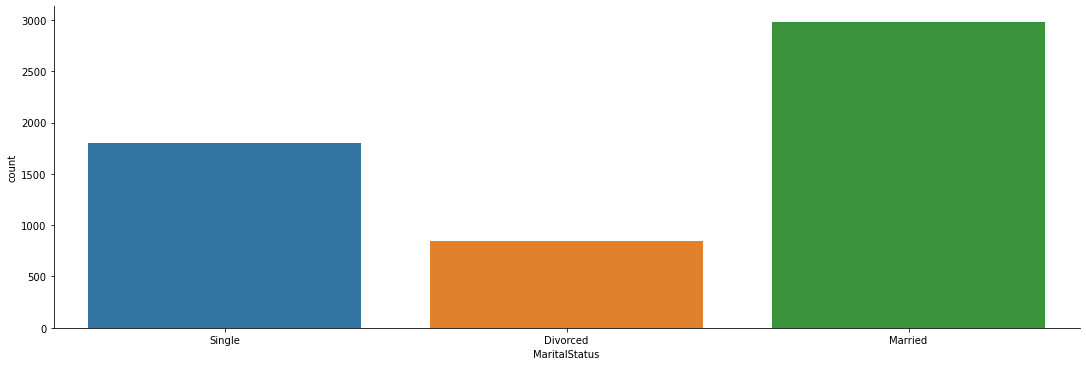

In [51]:
sns.catplot(data=df,x="MaritalStatus",aspect=3,kind="count")

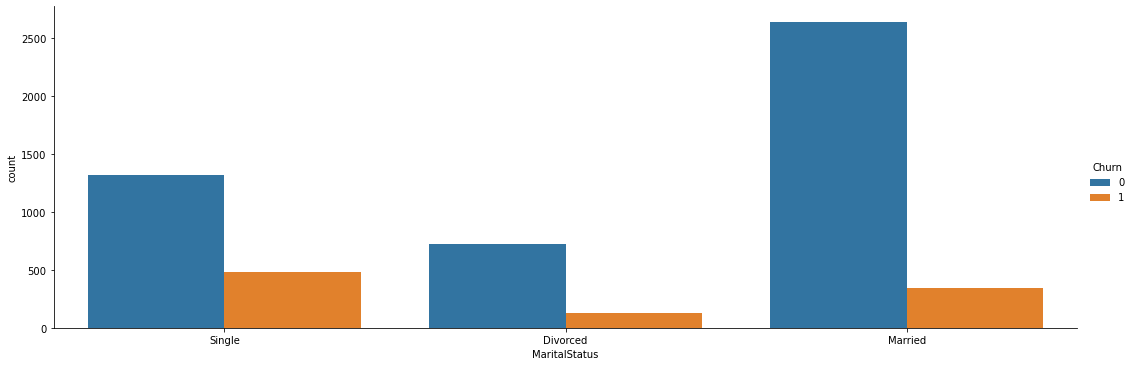

In [52]:
sns.catplot(data=df,x="MaritalStatus",hue="Churn",aspect=3,kind="count")

Single Customers Are Most Likely To Leave As Compared To Married Customers

Label Encoding Can Be Used Because There Is A Clear Hierarchy In Terms Of Statistics

### NumberOfAddress

In [53]:
df["NumberOfAddress"].isnull().sum()

0

No Nan Values

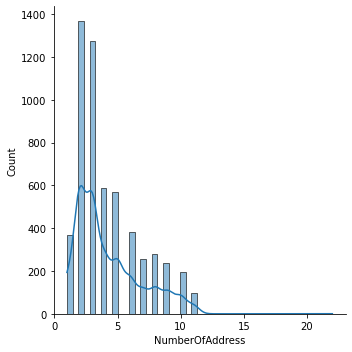

In [54]:
sns.displot(data=df,x="NumberOfAddress",kde=True)

### Complain

In [55]:
df["Complain"].isnull().sum()

0

No Nan Values

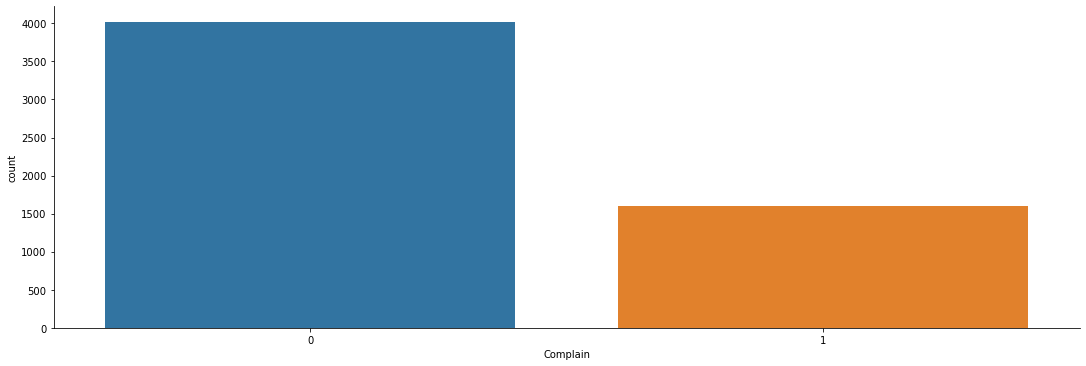

In [56]:
sns.catplot(data=df,x="Complain",aspect=3,kind="count")

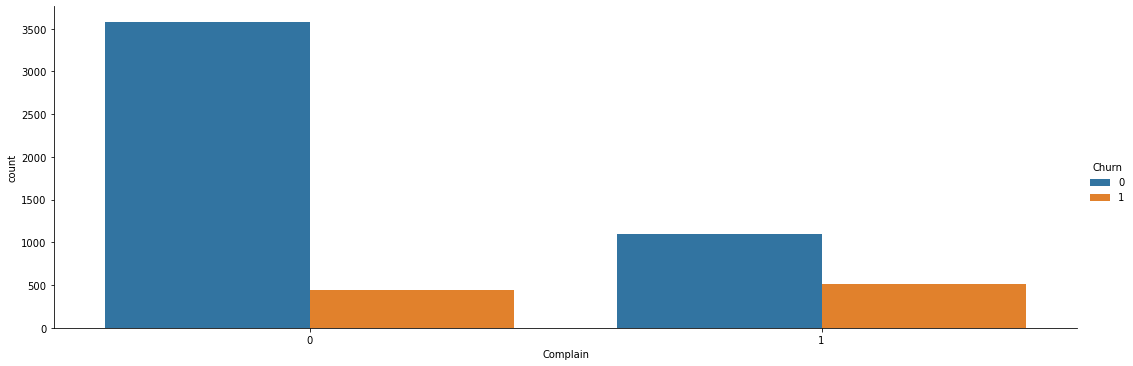

In [57]:
sns.catplot(data=df,x="Complain",hue="Churn",aspect=3,kind="count")

Those Who Complain Are More Likely To Leave

Label Encoding Can Be Used Because There Is A Clear Hierarchy In Terms Of Statistics

### OrderAmountHikeFromlastYear

In [58]:
df["OrderAmountHikeFromlastYear"].isnull().sum()

264

In [59]:
df["OrderAmountHikeFromlastYear"]=df["OrderAmountHikeFromlastYear"].fillna(value=df["OrderAmountHikeFromlastYear"].median())

<ipython-input-59-2140ad06e3c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OrderAmountHikeFromlastYear"]=df["OrderAmountHikeFromlastYear"].fillna(value=df["OrderAmountHikeFromlastYear"].median())


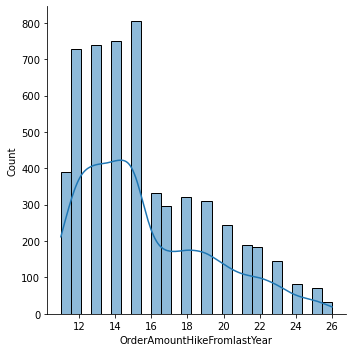

In [60]:
sns.displot(data=df,x="OrderAmountHikeFromlastYear",kde=True)

In [61]:
df["OrderAmountHikeFromlastYear"].skew()

0.8346482106225581

### CouponUsed

In [62]:
df["CouponUsed"].isnull().sum()

255

In [63]:
df["CouponUsed"]=df["CouponUsed"].fillna(value=df["CouponUsed"].median())

<ipython-input-63-f18b27de15f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CouponUsed"]=df["CouponUsed"].fillna(value=df["CouponUsed"].median())


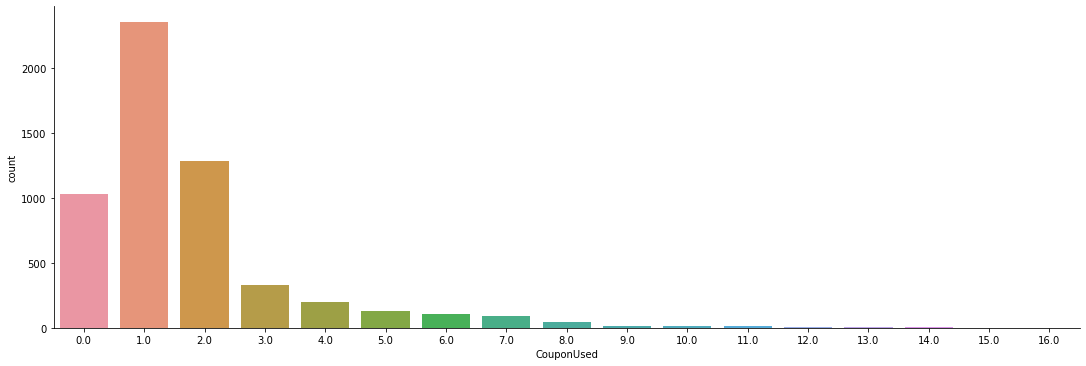

In [64]:
sns.catplot(data=df,x="CouponUsed",aspect=3,kind="count")

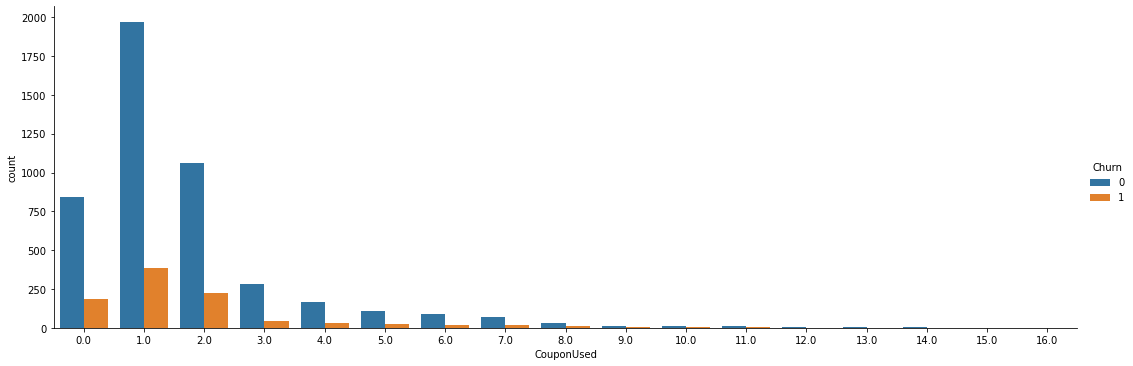

In [65]:
sns.catplot(data=df,x="CouponUsed",hue="Churn",aspect=3,kind="count")

### OrderCount

In [66]:
df["OrderCount"].isnull().sum()

258

In [67]:
df["OrderCount"]=df["OrderCount"].fillna(value=df["OrderCount"].median())

<ipython-input-67-6915b33af1d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OrderCount"]=df["OrderCount"].fillna(value=df["OrderCount"].median())


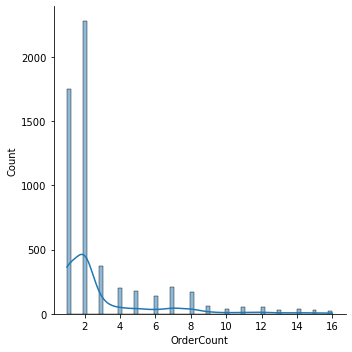

In [68]:
sns.displot(data=df,x="OrderCount",kde=True)

In [69]:
df["OrderCount"].skew()

2.275071557128981

OrderCount Is Right Skewed In Nature

### DaySinceLastOrder

In [70]:
df["DaySinceLastOrder"].isnull().sum()

307

In [71]:
df["DaySinceLastOrder"]=df["DaySinceLastOrder"].fillna(value=df["DaySinceLastOrder"].median())

<ipython-input-71-e485faef94a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DaySinceLastOrder"]=df["DaySinceLastOrder"].fillna(value=df["DaySinceLastOrder"].median())


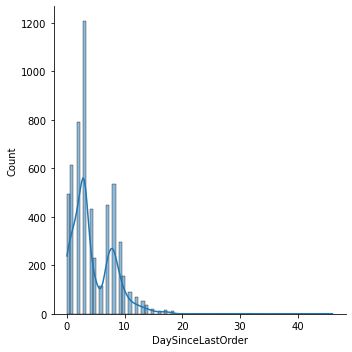

In [72]:
sns.displot(data=df,x="DaySinceLastOrder",kde=True)

In [73]:
df["DaySinceLastOrder"].skew()

1.2747514575051644

### CashbackAmount

In [74]:
df["CashbackAmount"].isnull().sum()

0

No Nan Values

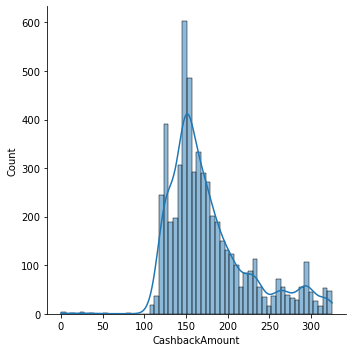

In [75]:
sns.displot(data=df,x="CashbackAmount",kde=True)

<AxesSubplot:xlabel='CashbackAmount'>

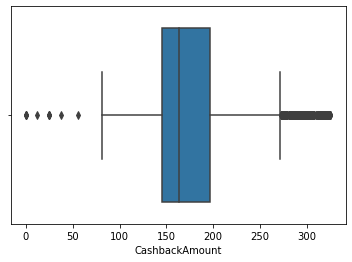

In [76]:
sns.boxplot(data=df,x="CashbackAmount")

In [77]:
df = df[(df['CashbackAmount'] < 300)]
df = df[(df['CashbackAmount'] > 50)]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5459 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5459 non-null   int64  
 1   Tenure                       5459 non-null   float64
 2   PreferredLoginDevice         5459 non-null   object 
 3   CityTier                     5459 non-null   int64  
 4   WarehouseToHome              5459 non-null   float64
 5   PreferredPaymentMode         5459 non-null   object 
 6   Gender                       5459 non-null   object 
 7   HourSpendOnApp               5459 non-null   float64
 8   NumberOfDeviceRegistered     5459 non-null   int64  
 9   PreferedOrderCat             5459 non-null   object 
 10  SatisfactionScore            5459 non-null   int64  
 11  MaritalStatus                5459 non-null   object 
 12  NumberOfAddress              5459 non-null   int64  
 13  Complain          

# Feature Engineering

In [79]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,2.931272,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [80]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data=df
#Using Label Encoder For Columns With Somewhat Clear Hierarchy, Atleast In Terms Of Count Value With Respect To Churn 
data['PreferredLoginDevice']= label_encoder.fit_transform(data['PreferredLoginDevice'])
data['PreferredPaymentMode']= label_encoder.fit_transform(data['PreferredPaymentMode'])
data['PreferedOrderCat']= label_encoder.fit_transform(data['PreferedOrderCat'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['MaritalStatus']= label_encoder.fit_transform(data['MaritalStatus'])


In [81]:
data.corr()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.338812,0.010092,0.083986,0.074688,-0.024981,0.034318,0.022800,0.111656,0.135215,0.106429,0.140074,0.047296,0.251234,-0.006911,0.001591,-0.021625,-0.157143,-0.156252
Tenure,-0.338812,1.000000,-0.081294,-0.057170,-0.011513,0.043436,-0.055982,-0.041726,-0.034750,-0.245896,-0.017329,-0.097739,0.229838,-0.023286,-0.005621,0.081731,0.147150,0.154701,0.436995
PreferredLoginDevice,0.010092,-0.081294,1.000000,-0.075586,-0.031611,-0.078083,0.009409,-0.076522,-0.100608,0.182065,0.051874,-0.003580,-0.056057,0.003202,-0.012980,-0.095659,-0.107546,-0.108201,-0.251696
CityTier,0.083986,-0.057170,-0.075586,1.000000,0.003358,0.232890,-0.022927,-0.005953,0.031353,-0.198817,-0.010013,0.003824,-0.026993,0.002909,-0.031840,0.027623,0.042426,0.012653,0.086543
WarehouseToHome,0.074688,-0.011513,-0.031611,0.003358,1.000000,0.018824,0.000993,0.075075,0.029166,-0.078290,0.016364,-0.020569,-0.003787,0.030730,0.039544,0.013500,0.016301,0.040743,0.033796
PreferredPaymentMode,-0.024981,0.043436,-0.078083,0.232890,0.018824,1.000000,-0.004395,0.046879,0.067104,-0.108494,-0.011296,-0.023911,0.025117,0.016468,0.020731,0.056523,0.035002,0.051414,0.165527
Gender,0.034318,-0.055982,0.009409,-0.022927,0.000993,-0.004395,1.000000,-0.023558,-0.019810,0.063524,-0.034795,-0.016603,-0.035174,-0.039859,-0.001636,-0.044157,-0.038504,-0.029583,-0.044414
HourSpendOnApp,0.022800,-0.041726,-0.076522,-0.005953,0.075075,0.046879,-0.023558,1.000000,0.308587,0.076355,0.032075,-0.037656,0.140884,0.006598,0.104713,0.185909,0.092970,0.049766,0.083314
NumberOfDeviceRegistered,0.111656,-0.034750,-0.100608,0.031353,0.029166,0.067104,-0.019810,0.308587,1.000000,0.020195,-0.014104,0.038601,0.082123,0.006211,0.068228,0.144677,0.089803,-0.005224,0.111234
PreferedOrderCat,0.135215,-0.245896,0.182065,-0.198817,-0.078290,-0.108494,0.063524,0.076355,0.020195,1.000000,-0.000006,0.052412,-0.093373,-0.001346,0.008704,-0.136238,-0.169569,-0.203625,-0.458566


In [82]:
data.corr(method="kendall")

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.321847,0.006223,0.083305,0.067936,0.001648,0.034318,0.014509,0.097666,0.139442,0.095057,0.142369,0.028064,0.251234,-0.016930,-0.003694,-0.021532,-0.157365,-0.138257
Tenure,-0.321847,1.000000,-0.073311,-0.045844,-0.025216,0.020932,-0.045219,-0.003344,-0.025990,-0.213183,-0.017770,-0.086994,0.203794,-0.031427,0.011016,0.051024,0.104698,0.121945,0.266274
PreferredLoginDevice,0.006223,-0.073311,1.000000,-0.063956,-0.011355,-0.037946,0.007650,-0.088233,-0.091764,0.159933,0.044401,-0.002921,-0.048860,0.003053,-0.016781,-0.098985,-0.135417,-0.096498,-0.244110
CityTier,0.083305,-0.045844,-0.063956,1.000000,0.007566,0.252752,-0.019612,-0.001610,0.021980,-0.185159,-0.005089,0.003402,-0.024226,0.002060,-0.028083,0.023463,0.029478,0.009708,0.117969
WarehouseToHome,0.067936,-0.025216,-0.011355,0.007566,1.000000,0.008791,0.005223,0.067799,0.018806,-0.046833,0.020642,-0.010592,0.015594,0.032873,0.028916,0.019726,0.021499,0.021773,0.021187
PreferredPaymentMode,0.001648,0.020932,-0.037946,0.252752,0.008791,1.000000,0.003570,0.020089,0.034615,-0.079859,-0.008192,-0.019418,0.008693,0.016259,0.000932,0.040548,0.012956,0.015394,0.094587
Gender,0.034318,-0.045219,0.007650,-0.019612,0.005223,0.003570,1.000000,-0.026387,-0.019092,0.060040,-0.030755,-0.018551,-0.033612,-0.039859,0.002865,-0.022406,-0.027647,-0.022471,-0.036939
HourSpendOnApp,0.014509,-0.003344,-0.088233,-0.001610,0.067799,0.020089,-0.026387,1.000000,0.319431,0.053061,0.028821,-0.033570,0.163597,0.007873,0.105044,0.284784,0.263816,0.088306,0.169295
NumberOfDeviceRegistered,0.097666,-0.025990,-0.091764,0.021980,0.018806,0.034615,-0.019092,0.319431,1.000000,0.021417,-0.007092,0.036423,0.100802,0.004827,0.073606,0.215973,0.209263,0.021005,0.146324
PreferedOrderCat,0.139442,-0.213183,0.159933,-0.185159,-0.046833,-0.079859,0.060040,0.053061,0.021417,1.000000,0.001437,0.052299,-0.086465,0.000310,0.015467,-0.051248,-0.098392,-0.179632,-0.457260


In [83]:
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.000000,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,2,1,8.0,6,1,3.000000,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,2,1,30.0,4,1,2.000000,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.000000,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,2,1,12.0,0,1,2.931272,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,0,1,30.0,3,1,3.000000,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,1,1,13.0,3,1,3.000000,5,0,5,1,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,1,1,11.0,4,1,3.000000,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,0,3,9.0,3,1,4.000000,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


<AxesSubplot:>

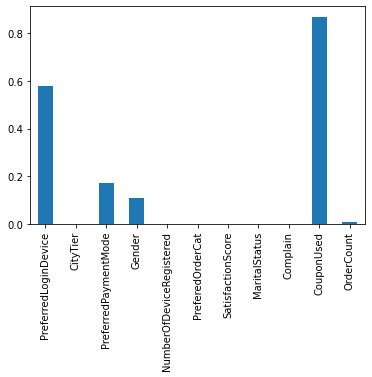

In [84]:
from sklearn.feature_selection import chi2

a = data.drop(columns=['Churn','Tenure','WarehouseToHome','HourSpendOnApp','NumberOfAddress','OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount'],axis=1)
b = data['Churn']

chi_scores = chi2(a,b)

p_values = pd.Series(chi_scores[1],index = a.columns)
p_values.plot.bar(stacked=True)

#Higher the pvalue more independent the Feature

ChiSquare Test For Comparing Categorical Features In Terms Of Dependency

In [85]:
data=data.drop(columns=["CouponUsed","PreferredLoginDevice"])

In [86]:
data

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,4,0,3.000000,3,2,2,2,9,1,11.0,1.0,5.0,159.93
1,1,9.0,1,8.0,6,1,3.000000,4,3,3,2,7,1,15.0,1.0,0.0,120.90
2,1,9.0,1,30.0,4,1,2.000000,4,3,3,2,6,1,14.0,1.0,3.0,120.28
3,1,0.0,3,15.0,4,1,2.000000,4,2,5,2,8,0,23.0,1.0,3.0,134.07
4,1,0.0,1,12.0,0,1,2.931272,3,3,5,2,3,0,11.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3,1,3.000000,2,2,1,1,6,0,18.0,2.0,4.0,150.71
5626,0,13.0,1,13.0,3,1,3.000000,5,0,5,1,6,0,16.0,2.0,3.0,224.91
5627,0,1.0,1,11.0,4,1,3.000000,2,2,4,1,3,1,21.0,2.0,4.0,186.42
5628,0,23.0,3,9.0,3,1,4.000000,5,2,4,1,4,0,15.0,2.0,9.0,178.90


## Model Selection

In [87]:
Y = data["Churn"]
X = data.drop(columns=["Churn"],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25,
                                                                random_state=0)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'RandomForestClassifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [150,200],
                'criterion': ["gini", "entropy"]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini','entropy']
            }
        },
        'LogisticReg':{
            'model': LogisticRegression(),
             'params': {
            }
        },
        'adaboost': {
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators' : [60,85],
                'learning_rate' : [0.7,0.5]
              
            }
        }
    }
    
    scores = []
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [89]:
find_best_model_using_gridsearchcv(X,Y)

C:\Users\2192a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2192a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,model,best_score,best_params
0,RandomForestClassifier,0.988459,"{'criterion': 'gini', 'n_estimators': 150}"
1,decision_tree,0.982964,{'criterion': 'entropy'}
2,LogisticReg,0.875068,{}
3,adaboost,0.897784,"{'learning_rate': 0.7, 'n_estimators': 85}"


### RandomForest Classifier Model

In [90]:
rf = RandomForestClassifier(criterion= 'entropy', n_estimators= 200)
rf.fit(X_train, Y_train)
predictions1 = rf.predict(X_test) 

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

rocauc=roc_auc_score(predictions1,Y_test)
accuracy=accuracy_score(Y_test,predictions1)
F1score=f1_score(Y_test,predictions1)
cm=confusion_matrix(Y_test,predictions1)



In [92]:
print("ROC AUC score: " + str(rocauc))
print("accuracy: " + str(accuracy))
print("F1 score: " + str(F1score))
print("Confusion Matrix: ")
print(cm)

ROC AUC score: 0.9706440405102384
accuracy: 0.9765567765567765
F1 score: 0.9269406392694063
Confusion Matrix: 
[[1130    8]
 [  24  203]]


<AxesSubplot:>

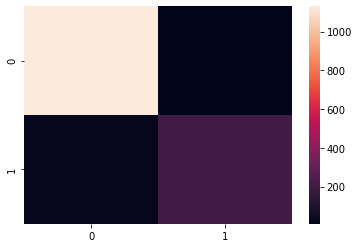

In [93]:
sns.heatmap(cm, annot=False)

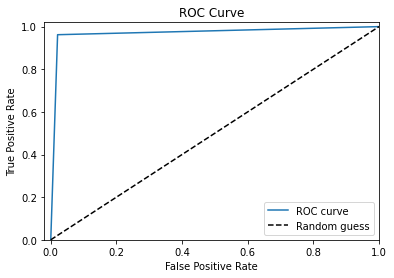

In [97]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(predictions1,Y_test)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

## With A Higher Overall Combination Of ROC AUC Score And F1Score, The RandomForest Model Shall Be Our Chosen Model

In [94]:
data.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

In [95]:
import pickle
pickle.dump(rf, open('ECommerceChurnRF.pkl','wb'))